# Define zones tool

This notebook will guide you in how to create the coordinates of the service and dwelling zones in each video.

## Contents

1. [What are areas and zones?](#What-are-areas-and-zones?)
2. [How areas and zones are defined?](#How-areas-and-zones-are-defined?)
3. [How do I know the coordinates of my zones?](#How-do-I-know-the-coordinates-of-my-zones?)



## What are areas and zones?

* Area: It refers to the place where the video was recorded. 
* Zones: It refers to the service and the dwelling zones in the video. 

See the following image as an example:

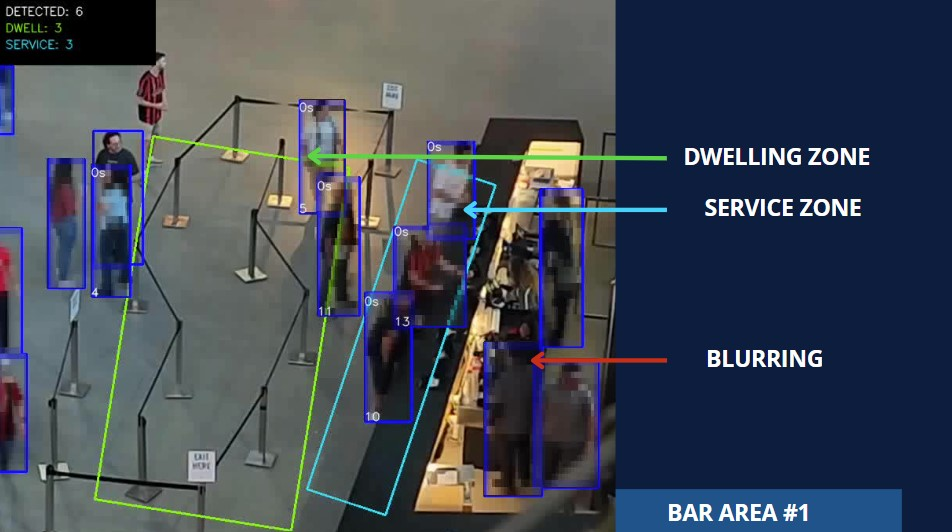

## How areas and zones are defined?

The areas are defined as an Array of JSON objects. Each object contains the name of the area and the coordinates of the service and dwell zones. These zones are treated as a rectangle, specifying the 4 coordinates (x,y) for each vertex of the rectangle. See the following example:

```
[
   {
      "area":"Restaurant",
      "dwell_zone":"[(200,500),(500,510),(490,710),(190,700)]",
      "service_zone":"[(540,580),(1000,645),(990,720),(530,655)]"
   },
   {
      "area":"Nozone",
      "dwell_zone":"[]",
      "service_zone":"[]"
   }
]
```

> If the values of dwell_zone (green rectangle) and service_zone (blue rectangle) have valid coordinates such as the **"Restaurant"** area defined in the JSON object, the model will draw the zones and **only the time of the people who appear inside them will be measured**. As follows: 

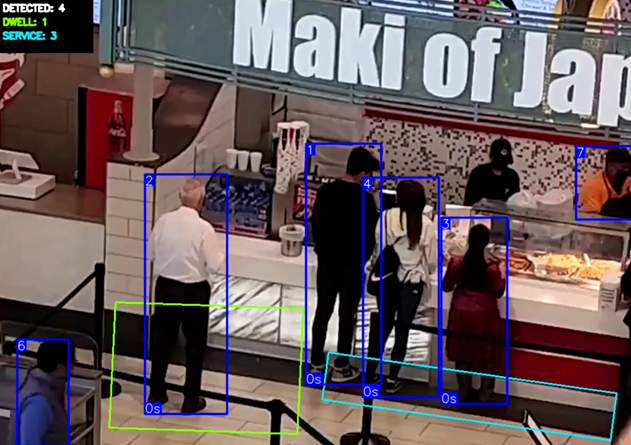

> If the dwell_zone and service_zone values have an empty Array as the **"Nozone"** area defined in the JSON object, the model will not draw any zone and **the time of all the people who appear in the video will be measured.**

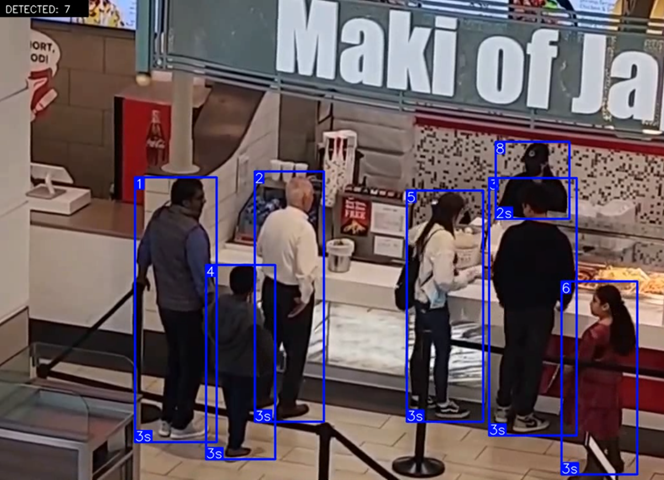

## How do I know the coordinates of my zones?

### 1. Define your video 
Upload your video or a frame of your video to the `areas` folder. 

> If you choose a frame, be aware of the resolution because the image and the video must have the same resolution.


### 2. Set initial coordinates
You can start defining the initial values for the zones (randomly), the color of the zones and the name of the frame you want to use for testing

In [74]:
service_zone = [(540,580), (1000,645), (990,720), (530,655)]
dwell_zone = [(200,500), (500,510), (490,710), (190,700)]
color_service = (252, 227, 3) #Blue Color
color_dwell = (3, 252, 127)   #Green Color
rescale=1
video = "./areas/example.jpg" #This value could be an image or a video

#### 3. See the coordinates on the image
Now, you can execute this code to see how the defined coordinates would look like on the image.

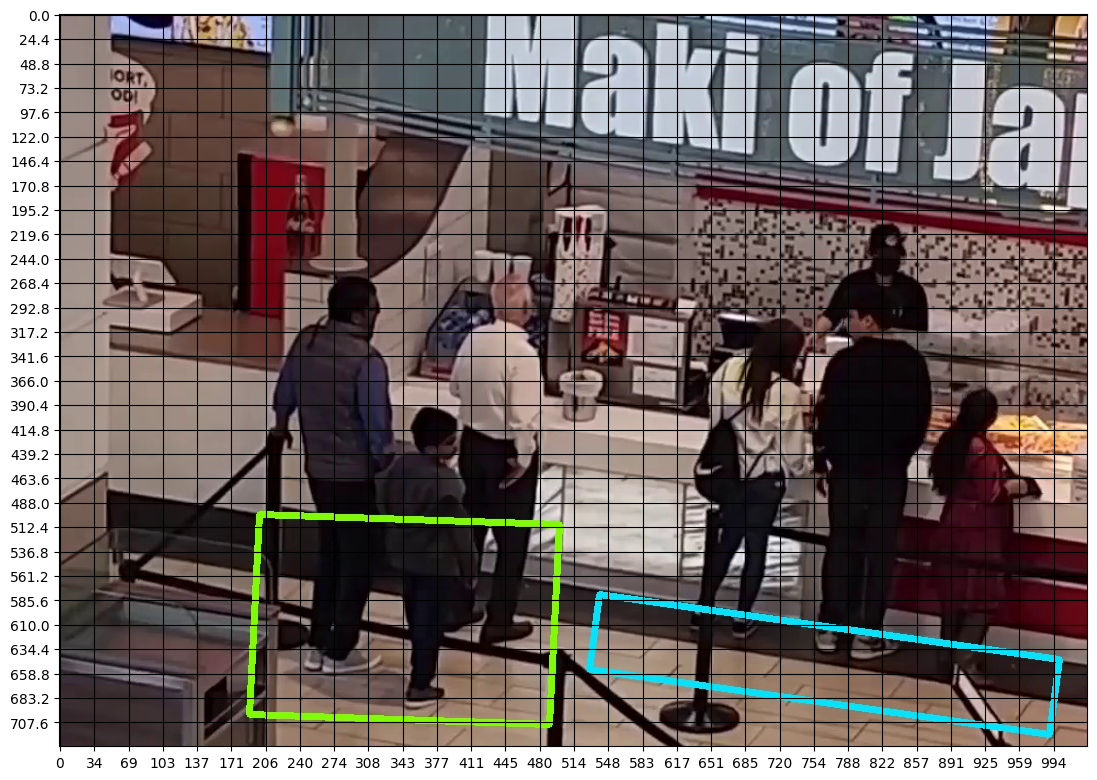

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import cv2
import os
from PIL import Image

    
def show_service_and_dwell_areas(image, coor, color):
    upper_left, upper_right, lower_right, lower_left = coor
    cv2.line(image, lower_left, lower_right,color , 5)
    cv2.line(image, upper_left, upper_right,color , 5)
    cv2.line(image, lower_left, upper_left,color, 5)
    cv2.line(image, lower_right, upper_right, color, 5)

output_file_name = 'frame.jpg'
cam = cv2.VideoCapture(video)
ret,frame = cam.read()
show_service_and_dwell_areas(frame,service_zone,color_service)
show_service_and_dwell_areas(frame,dwell_zone,color_dwell)
width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

frame = cv2.resize(frame, (int(width * rescale), int(height * rescale)))

# writing the extracted images
cv2.imwrite(output_file_name, frame)
cam.release()
cv2.destroyAllWindows()

# Open image file
image = Image.open(output_file_name)
width, height = image.size
my_dpi=100.
part = 30

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval_x= width*1.0 / part
myInterval_y= height*1.0 / part
loc_x = plticker.MultipleLocator(base=myInterval_x)
loc_y = plticker.MultipleLocator(base=myInterval_y)
ax.xaxis.set_major_locator(loc_x)
ax.yaxis.set_major_locator(loc_y)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-', color='#000000')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval_x)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval_y)))

# Add labels to the gridsquares
for j in range(ny):
    y=myInterval_x/2+j*myInterval_y
    for i in range(nx):
        x=myInterval_x/2.+float(i)*myInterval_x

os.remove(output_file_name)

#### 4. Build final area object
If the zones were drawed just where you expected, build the areas object with the structure mentioned before. Otherwise, change the coordinates of the zone in the step 3.2. Remember to use the grid that was drawed on your image as a guide to choose the coordinates.
